In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

import pré_traitement_fichier_csv as ptf
import affichage_courbe as ac
import detection_phase as dp
import traitement_graphique as tg

In [22]:
# initialisation du fichier et création des listes

path_fichier = "C:/Users/maelm/Documents/L2/projet S4/2023-04-06 Harbin nanopillar CuNb/2023-04-06 Harbin nanopillar CuNb/Harbin_3_0deg/Harbin3_0deg_2/data/data.csv"


dic_exp = ptf.csv_to_list(path_fichier)

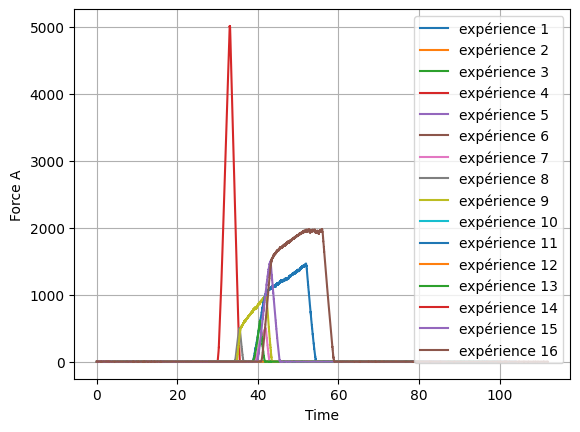

In [23]:
#affichage de toutes les expériences sur le même graphe
ac.plot_all_expériences(dic_exp, "Time", "Force A")


In [18]:
nom_pilier = "CuNb_Harbin_3_0deg_air_2"

# selection de l'expérience que l'on va analyser par la suite
current_exp = dic_exp["exp_1"]

# modifie les données pour prendre en compte la déformation de la machine
déformation_machine = 1*10**(-6)
tg.valeur_réelle_piezo(current_exp, déformation_machine)

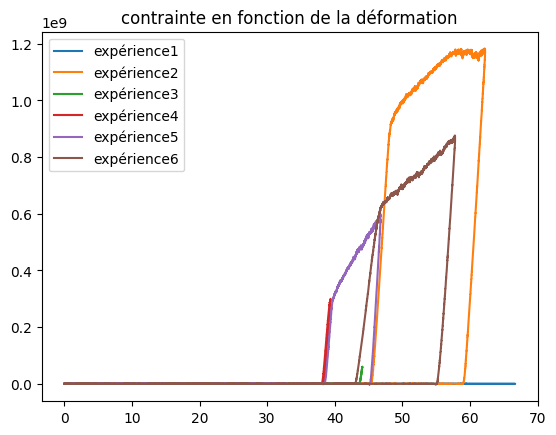

In [24]:
liste=["2", "16", "6", "8", "9","11"]
liste2 =[i for i in range(1, 20)]
hauteur_pilier = 4.5*10**(-6) # en mètre
surface_pilier = 1.673 * 10 **(-12)

compteur = 0
for i in liste:
    compteur += 1
    # dp.determine_phase(dic_exp[f"exp_{i}"])
    contrainte = tg.calcul_contrainte(dic_exp[f"exp_{i}"], surface_pilier)
    déformation = tg.calcul_déformation(dic_exp[f"exp_{i}"], hauteur_pilier)
    plt.plot(déformation, contrainte, label=f"expérience{compteur}")

plt.title("contrainte en fonction de la déformation")

"""plt.plot(dic_exp["exp_2"]["Time"][15000:30000], dic_exp["exp_2"]["Force A"][15000:30000],label="1ère compression")
plt.plot(dic_exp["exp_19"]["Time"][15000:30000], dic_exp["exp_19"]["Force A"][15000:30000],label="2ème compression")
plt.plot(dic_exp["exp_6"]["Time"][15000:30000], dic_exp["exp_6"]["Force A"][15000:30000],label="3ème compression")
plt.plot(dic_exp["exp_8"]["Time"][15000:30000], dic_exp["exp_8"]["Force A"][15000:30000],label="4ème compression")
plt.plot(dic_exp["exp_9"]["Time"][15000:30000], dic_exp["exp_9"]["Force A"][15000:30000],label="5ème compression")
plt.plot(dic_exp["exp_10"]["Time"][15000:30000], dic_exp["exp_10"]["Force A"][15000:30000],label="6ème compression")
plt.title("Force A en fonction du temps")"""
plt.legend(loc="upper left")



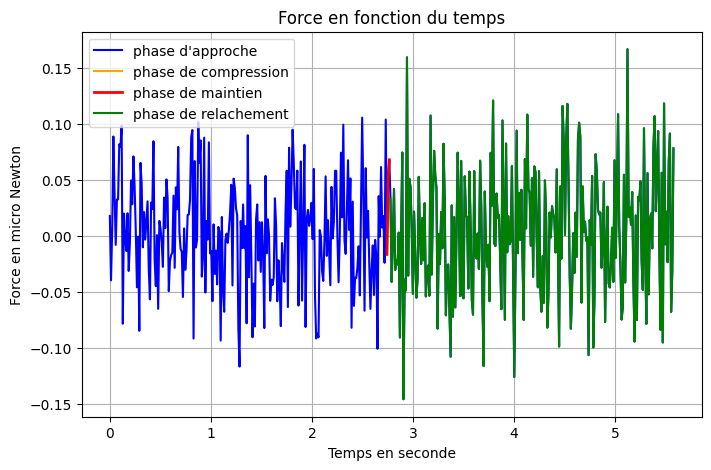

In [14]:
# détection des phases de l'expérience. Cette fenètre sert a vérifier que la phase d'approche et de compression ont été correctement séparées

res = dp.determine_phase(current_exp)

plt.figure(1, (8, 5))
plt.plot(current_exp["Time"], current_exp["Force A"], color="blue", label="phase d'approche")
plt.plot(res[1], res[0], color="orange", label="phase de compression")
plt.plot(res[3], res[2], color="red", label="phase de maintien", linewidth=2)
plt.plot(res[5], res[4], color="green", label ="phase de relachement")
plt.xlabel("Temps en seconde")
plt.ylabel("Force en micro Newton")
plt.title("Force en fonction du temps")

plt.grid()
plt.legend()
plt.show()

module d'Young = 287.0155294242969 giga Pascal


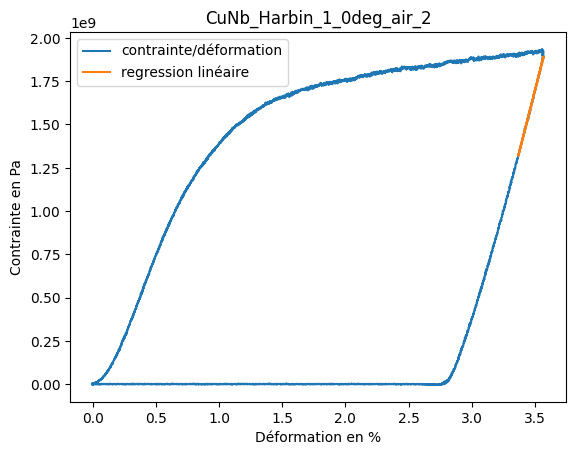

In [6]:
hauteur_pilier = 9.99*10**(-6) # en mètre
surface_pilier = 1.673 * 10 **(-12)

contrainte = tg.calcul_contrainte(current_exp, surface_pilier)
déformation = tg.calcul_déformation(current_exp, hauteur_pilier)

res = tg.calcul_module_young(current_exp, contrainte, déformation)
module_young = res[2]/10**9

plt.plot(déformation, contrainte, label="contrainte/déformation")
plt.plot(res[0], res[1], label="regression linéaire")

plt.xlabel("Déformation en %")
plt.ylabel("Contrainte en Pa")
plt.title(nom_pilier)
plt.text(0.01, 0.1*10**9,f"module d'Young = {module_young} GPa")

plt.legend()

print("module d'Young =", module_young, "giga Pascal")


In [9]:
#calcul les modules young pour chaque expérience du fichier

déformation_machine = 1*10**(-6)
hauteur_pilier = 3.706*10**(-6) # en mètre
surface_pilier = 2.182 * 10 **(-12)


tg.calcul_all_module_young(dic_exp, surface_pilier, hauteur_pilier)

TypeError: calcul_déformation() takes 2 positional arguments but 3 were given

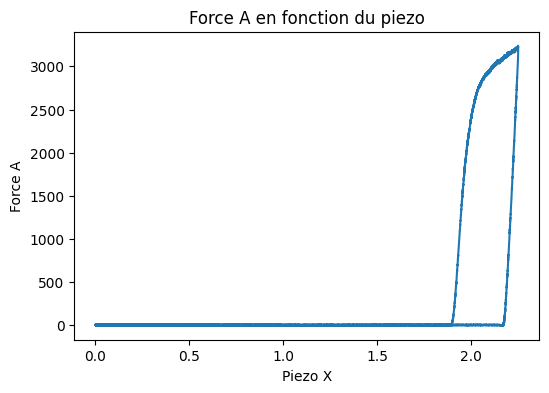

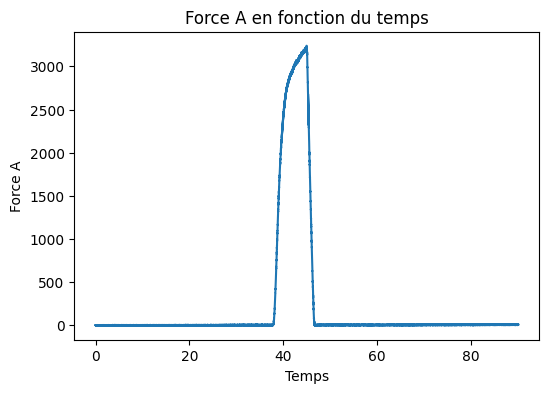

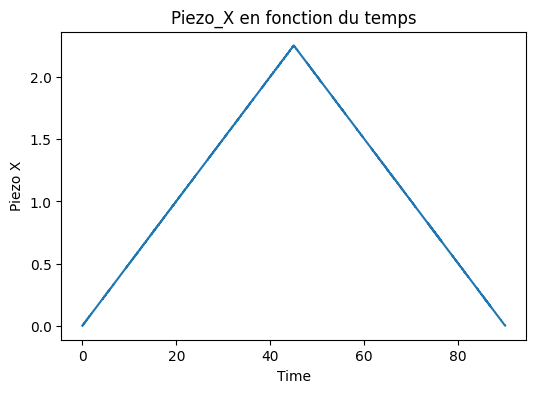

In [ ]:
ac.plot_ForceA_Piezo(current_exp)
ac.plot_ForceA_Time(current_exp)
ac.plot_Piezo_Time(current_exp)

In [ ]:
def calcul_limite_elasticité(exp, contrainte, déformation, module_young):
    dp.determine_phase(exp)
    i_debut_phase_2 = 0
    i_deb_is_0 = True
    i_fin_phase_2 = 0
    i_fin_is_0 = True
    for i in range(len(exp["Phase"])):
        if exp["Phase"][i] == 2 and i_deb_is_0:
            i_debut_phase_2 = i
            i_deb_is_0 = False
        if exp["Phase"][i] == 3 and i_fin_is_0:
            i_fin_phase_2 = i
            i_fin_is_0 = False
    len_Reg_lin = 20
    liste_candidat_limite = []
    is_in_régime_élastique = False
    for i in range(len(contrainte[i_debut_phase_2:i_fin_phase_2])-11):
        Y_RegLin = contrainte[i_debut_phase_2 +
                              i: i_debut_phase_2 + i + len_Reg_lin]
        X_RegLin = déformation[i_debut_phase_2 +
                               i: i_debut_phase_2 + i + len_Reg_lin]
        liste_candidat_limite.append(i)
        coeff_dir = tg.regression_linéaire(X_RegLin, Y_RegLin)[2]
        if 0.38*10**9 > contrainte[i_debut_phase_2 + i] > 0.35*10**9:
            print(coeff_dir/10**9)
        if (abs(module_young - coeff_dir)/10**9) < 3 and not is_in_régime_élastique:
            print("début partie linéaire :",
                  contrainte[i_debut_phase_2 + i]/10**9)
            is_in_régime_élastique = True
        if (abs(module_young - coeff_dir)/10**9) > 5 and is_in_régime_élastique:
            print("limite d'élasticité =",
                  contrainte[i_debut_phase_2 + i]/10**9)
            return i_debut_phase_2
    print("PAS DE RESULTAT")


calcul_limite_elasticité(current_exp, contrainte, déformation, module_young)


154.62659550509204
150.81001118687416
151.01144924714998
150.54158332491994
151.44352173589667
147.60896632616755
145.42310012888424
155.25913576679244
165.68268468964746
169.39012607495172
177.43516980877683
187.25697985496944
190.28865528479838
202.48693576365056
198.88548914461197
193.7944337750589
191.5884255894371
PAS DE RESULTAT
